<a href="https://colab.research.google.com/github/Lidiya-cutie/DS_SkillFactory/blob/main/SkillFactory_Visualization_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Раздел 2. Модуль 5. Визуализация данных

## <center> Графические возможности библиотеки pandas

In [4]:
import pandas as pd

In [20]:
import matplotlib


In [ ]:
covid_data = pd.read_csv('/content/covid_data.csv') 

In [ ]:
country_vaccinations = pd.read_csv('/content/country_vaccinations.csv')

In [ ]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [ ]:
covid_data['date'] = pd.to_datetime(covid_data['date'])


In [ ]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']


In [ ]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [ ]:
country_vaccinations['date'] = pd.to_datetime(country_vaccinations['date'])


In [ ]:
covid_df = covid_data.merge(country_vaccinations, on=['date', 'country'], how='left')

In [ ]:
#используем объединенный датасет о заболеваемости и вакцинации
covid_df['date'] = pd.to_datetime(covid_df['date'])
covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,iso_code,...,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid_df.to_csv (r'C:\Users\Гарик\Documents\GitHub\DS_SkillFactory\pandas_files\covid_df.csv', index= False )

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Основным методом для создания простейших графиков в Pandas является метод plot(). Разберем его основные параметры:
* x - название признака, который будет отложен по оси абсцисс
* y - название признака, который будет отложен по оси ординат
* figsize - размер графика (кортеж из ширины и высоты в дюймах)
* **kind** - тип визуализации. Основные типы:
    * 'line' - линейный график (стоит по умолчанию)
    * 'bar' - столбчатая диаграмма
    * 'barh' - горизонтальная столбчатая диаграмма
    * 'hist' - гистограмма
    * 'box' - коробчатая диаграмма (boxplot)
    * 'pie' - круговая диаграмма
    * 'scatter' - диаграмма рассеяния
* grid - отображение сетки (по умолчанию False)
* legend - отображение легенды (по умолчанию False)
* title - название графика
* color - цвет


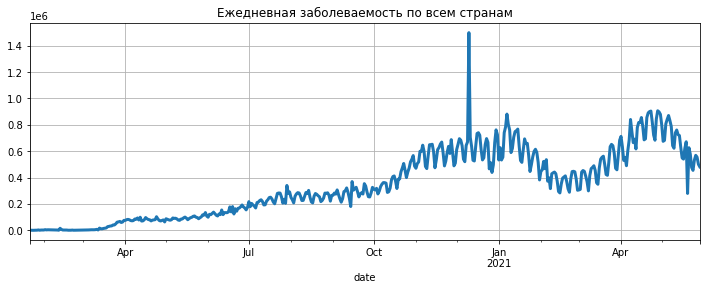

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость по всем странам',
    grid = True,
    lw=3
);

**Выводы по графику:** на графике отчетливо виден умеренный начальный рост заболеваемости, после чего наблюдается ее резкое повышение в середине октября 2020, а в декабре 2020 года вспышка коронавируса (зафиксировано более 1.4 млн заболевших в день). После чего наблюдается постепенное уменьшение числа ежедневно фиксированных случаев и наступление второй волны в марте 2021. Наконец, начиная с мая 2021 наблюдается очередной спад.

Пилообразность графика - подъемы и спады с периодом в 7 дней - могут быть связаны с рабочими и выходными днями.
Нам неизвестно, как  устроен во времени процесс постановки диагноза и сбора статистики и отличается ли он в разных странах. Можно предположить, что спад в выходные обусловлен меньшей интенсивностью работы медицинских служб. Также можно предположить, что в тех случаях, когда диагноз ставится по результатам анализа, если в выходные берется/проводится меньше тестов, к понедельнику они еще не готовы и диагноз еще не поставлен. Также можем предположить, что минимум в понедельник может быть запаздыванием подсчета статистики, т.е. на самом деле данные за понедельник - это данные за воскресенье


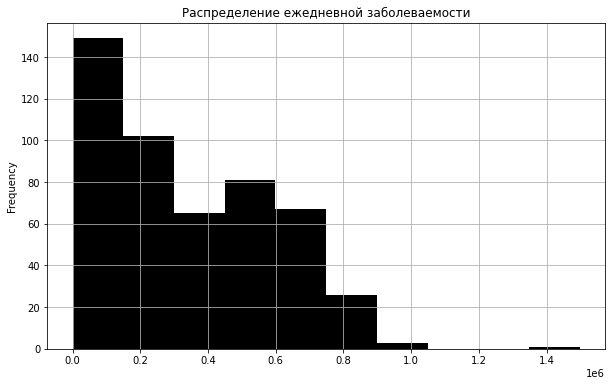

In [ ]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

In [18]:
import numpy as np
first_line = [x*y for x in range(2, 100, 6) for y in range (7, 1, -2)]
second_line = [x ** 0.5 for x in range(1000, 1101, 2)]
third_line = [x**2 for x in range(51)]

big_secret = np.array([first_line, second_line, third_line, second_line, first_line])
big_secret[::2, ::2] = 1
big_secret[1::2, 1::2] = -1
big_secret[1][1]

-1.0

**Выводы по графику:** по гистограмме можно судить о частоте попадания ежедневной заболеваемости в определенный интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн. человек), разбитый на 10 равных интервалов. На оси ординат - число наблюдений, попавших в этот интервал.

Во-первых, мы видим модальное значение близ нуля (от 0 до примерно 150 тыс. заболеваний в день), т.е. большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.

Во-вторых, в глаза бросается "пенёк", который соответствует резкой вспышке заболеваемости, которую мы видели ранее, его высота очень мала, ведь такое наблюдение единственно. Даже на гистограмме кажется, что данное наблюдение является аномальным и скорее всего является выбросом.

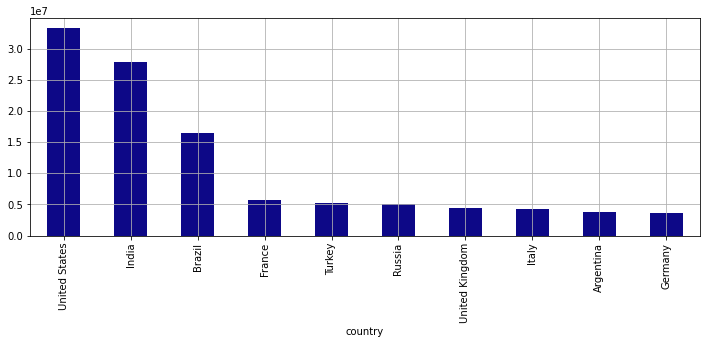

In [ ]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

**Выводы по графику:** на диаграмме видно, что лидерами по числу заболевших являются Соединенные Штаты, Индия и Бразилия. Соотношение зафиксированных случаев заражения в остальных странах примерно одинаково.

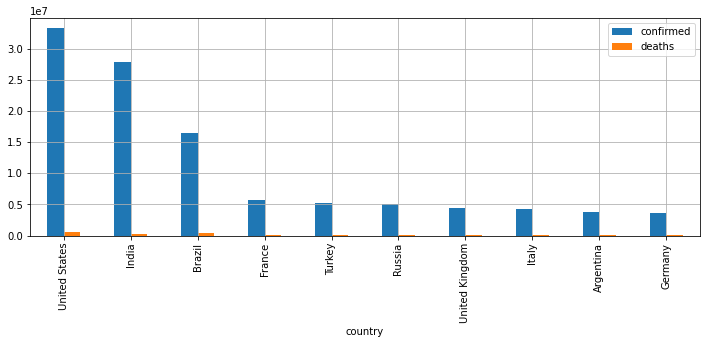

In [ ]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    legend=True
);

**Выводы по графику:** график является небольшим усовершенствованием предыдущего. Теперь на графике можно увидеть соотношение числа зафиксированных случаев и смертей. 
Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это косвенно может говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие- по клинической картине, учитывающей и другие показатели). Это с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идален).


Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить "здесь и сейчас", не сильно заморачиваясь над их внешним видом. Однако, такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации - довольно ограниченный функционал:
* С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации он не подходит
* Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах
* Сложно или иногда даже невозможно корректировать внешний вид графика 
* Отсутствует 3D визуализация


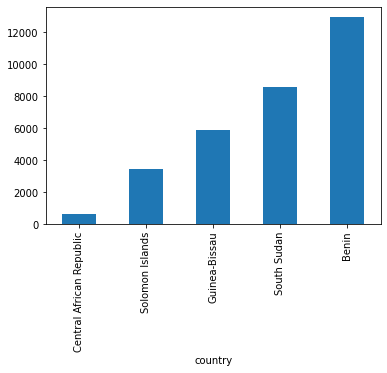

In [ ]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

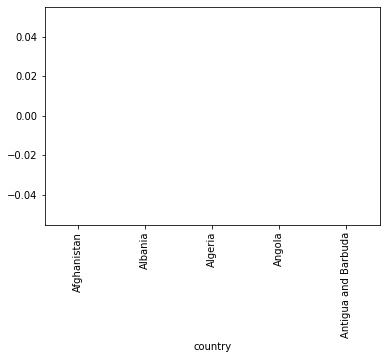

In [ ]:
covid_df.groupby(['country'])['total_vaccinations'].first().nsmallest(5).plot(kind='bar');

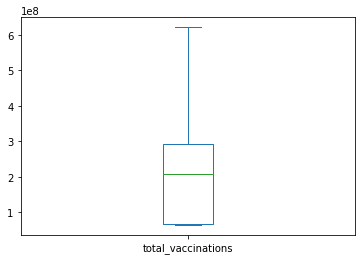

In [ ]:
covid_df.groupby(['country'])['total_vaccinations'].last().nlargest(5).plot(kind='box');

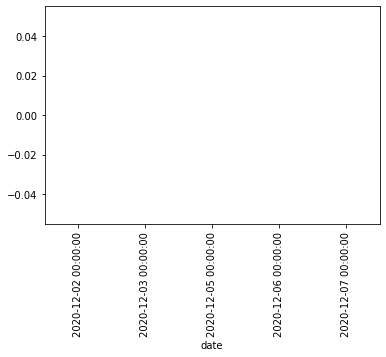

In [ ]:
covid_df.groupby(['date'])['total_vaccinations'].mean().nsmallest(5).plot(kind='bar');

# АНАЛИЗ ДАННЫХ ПРИ ПОМОЩИ МЕТОДА РУЧНОГО ПОИСКА И ЗДРАВОГО СМЫСЛА

Рассчитать статистические показатели (минимум, максимум, среднее, квантили) и по ним определить наличие аномалий можно с помощью уже знакомого вам метода describe(). Рассчитаем статистические показатели для признака жилой площади (life_sq).

In [5]:
sber_data = pd.read_csv('/content/sber_data.csv')
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Благодаря методу describe() мы видим, что, во-первых, у нас есть квартиры с нулевой жилой площадью. Во-вторых, в то время как 75-й квантиль равен 43, максимум превышает 7 тысяч квадратных метров (жилище короля!). 

Найдём число квартир с нулевой жилой площадью:

In [6]:
print(sber_data[sber_data['life_sq'] == 0].shape[0])

45


Такие квартиры авляются апартаментами и должны быть исключены из данного исследования. Надо исключить и жилплощадь более 7000 квадратных метров

In [7]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


Возникает вопрос: а много ли у нас таких квартир, у которых жилая площадь больше, чем суммарная?

Выясним это с помощью фильтрации:

In [8]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])

37


Таких квартир оказывается 37 штук. Подобные наблюдения уже не поддаются здравому смыслу — они являются ошибочными, и от них стоит избавиться. Для этого можно воспользоваться методом drop() и удалить записи по их индексам:

In [9]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


Теперь обратим свой взор на количество этажей (floor). Для этого воспользуемся все тем же методом describe()

In [12]:
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

Сложно представить себе, что в Москве есть здания, где этажей больше 50. По крайней мере пока. Отфильтруем эту квартиру.

In [10]:
display(sber_data[sber_data['floor']> 50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


В нашем случае это выброс, так как дома такой высотности находятся в Москва-сити, а не в Ломоносовском районе

# СУЧЕСТВУЕТ ДРУГОЙ МЕТОД АНАЛИЗА ДАННЫХ И УСТРАНЕНИЯ ТАК НАЗЫВАЕМЫХ ВЫБРОСОВ - МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

Отличным помощником в поиске потенциальных выбросов является визуализация. Если признак является числовым, то можно построить гистограмму или коробчатую диаграмму, чтобы найти аномалии.

На гистограмме мы можем увидеть потенциальные выбросы как низкие далеко отстоящие от основной группы столбцов «пеньки», а на коробчатой диаграмме — точки за пределами усов.

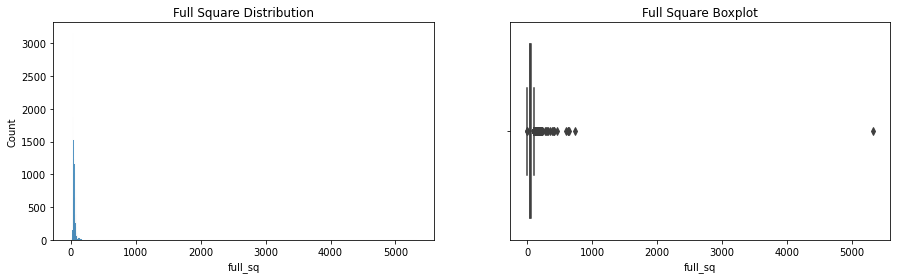

In [11]:
# Для корректной работы не забываем импортировать библиотеки
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

*Именно так выглядят типичные графики распределений с выбросами в данных.*

**Mетод межквартильного размаха ** (его еще называют методом Тьюки), который используется для построения коробчатой диаграммы

In [12]:
#запишем функцию для вычисления межквартильного размаха
def outliers_iqr(data, feature):
    x = data[feature]
    #вычислить 25-ый и 75-ый квантили (первый и третий квартили) — и  для признака, который мы исследуем
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    #вычислить межквартильное расстояние: IQR = Q(75) - Q(25)
    iqr = quartile_3 - quartile_1
    #вычислить верхнюю и нижнюю границы Тьюки
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов
outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Согласно классическому методу Тьюки, под выбросы у нас попали 963 записи в таблице. Давайте построим гистограмму и коробчатую диаграмму на новых данных cleaned_sber_data:

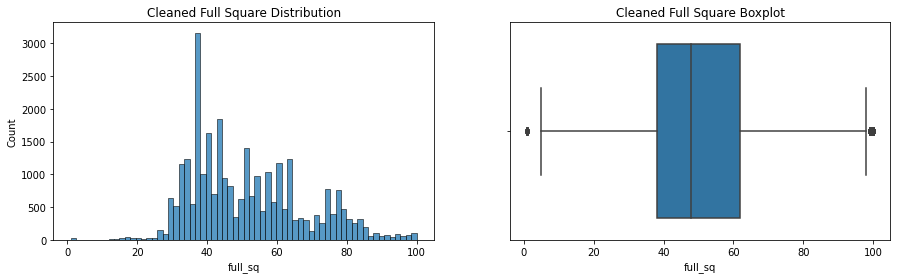

In [13]:
# задаем параметры для двух графиков (количество графиков повертикали (nrows=1) и горизонтали(ncols=2))
# и их размеры
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
# параметры для вывода гистограммы
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
# параметры для вывода коробчатой диаграммы
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

In [14]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x = data[feature]
    #вычислить 25-ый и 75-ый квантили (первый и третий квартили) — и  для признака, который мы исследуем
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    #вычислить межквартильное расстояние: IQR = Q(75) - Q(25)
    iqr = quartile_3 - quartile_1
    #вычислить верхнюю и нижнюю границы Тьюки
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Ослабим критерии к признаку full_sq из таблицы sber_data данным с параметрами left=1 и right=6

In [ ]:
def outliers_iqr_mod(data, feature, left=1, right=6):
    x = data[feature]
    #вычислить 25-ый и 75-ый квантили (первый и третий квартили) — и  для признака, который мы исследуем
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    #вычислить межквартильное расстояние: IQR = Q(75) - Q(25)
    iqr = quartile_3 - quartile_1
    #вычислить верхнюю и нижнюю границы Тьюки
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#применим эту функцию к таблице sber_data и признаку full_sq, а также выведем размерности результатов
outliers, cleaned = outliers_iqr_mod(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

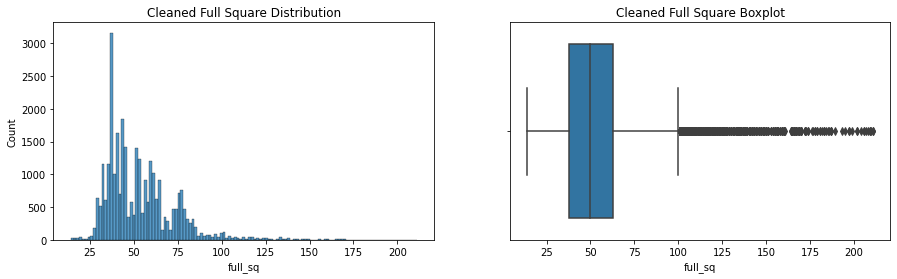

In [16]:
# Если мы построим гистограмму и коробчатую диаграмму на полученных данных, то увидим вот такую картинку:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Cleaned Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Cleaned Full Square Boxplot');

# МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.



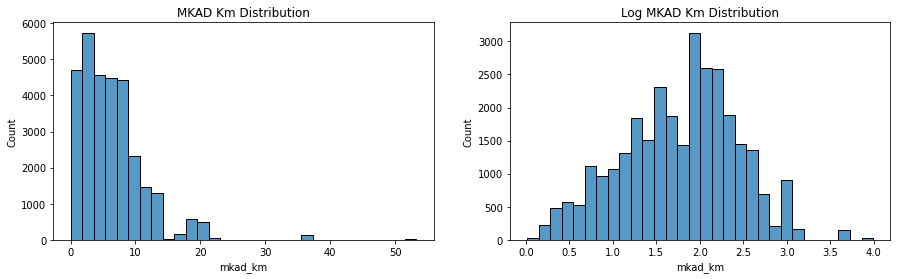

In [20]:
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

In [22]:
# Численный показатель асимметрии можно вычислить с помощью метода:skew():
print(log_mkad_km.skew())

-0.14263612203024953


Напишем функцию outliers_z_score(), которая реализует этот алгоритм. 

На вход она принимает DataFrame и признак, по которому ищутся выбросы. В дополнение добавим в функцию возможность работы в логарифмическом масштабе: для этого введём аргумент log_scale. Если он равен True, то будем логарифмировать рассматриваемый признак, иначе — оставляем его в исходном виде.

Как и раньше, функция будет возвращать выбросы и очищенные от них данные:

In [23]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    # вычислим математическое ожидание mu (среднее)
    mu = x.mean()
    # вычислим стандартное отклонение (sigma) признака x;
    sigma = x.std()
    # вычислим нижнюю границу интервала
    lower_bound = mu - 3 * sigma
    # вычислим верхнюю границу интервала
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


Итак, метод z-отклонения нашел нам 33 потенциальных выброса по признаку расстояния до МКАД. Давайте узнаем, в каких районах (sub_area) представлены эти квартиры:


In [24]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

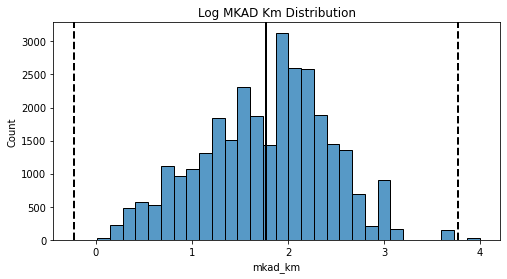

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score() параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3. Результирующую функцию назовите outliers_z_score_mod().

In [48]:
import numpy as np
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    # вычислим математическое ожидание mu (среднее)
    mu = x.mean()
    # вычислим стандартное отклонение (sigma) признака x;
    sigma = x.std()
    # вычислим нижнюю границу интервала
    lower_bound = mu - left * sigma 
    # вычислим верхнюю границу интервала
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True

In [39]:
import numpy as np
def outliers_z_score_mod(data, feature, left=3, right=3.5, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    # вычислим математическое ожидание mu (среднее)
    mu = x.mean()
    # вычислим стандартное отклонение (sigma) признака x;
    sigma = x.std()
    # вычислим нижнюю границу интервала
    lower_bound = mu - left *sigma 
    # вычислим верхнюю границу интервала
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# Применим эту функцию к таблице sber_data и признаку mkad_km, а также выведем размерности результатов:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 232
Результирующее число записей: 30239


Построим гистограмму для признака price_doc в логарифмическом масштабе

Text(0.5, 1.0, 'Log PRICE doc Distribution')

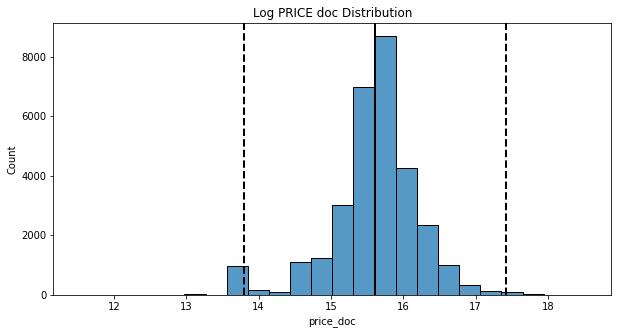

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
log_price_doc = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_price_doc, bins=24, ax=ax)
histplot.axvline(log_price_doc.mean(), color='k', lw=2)
histplot.axvline(log_price_doc.mean()+ 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price_doc.mean()- 3 * log_price_doc.std(), color='k', ls='--', lw=2)
histplot.set_title('Log PRICE doc Distribution')

Найдите потенциальные выбросы в таблице sber_data и признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в в обе стороны распределения. Сколько выбросов вы получили?

> Блок с отступами



In [49]:
import numpy as np
def outliers_z_score_mod(data, feature, left=3.7, right=3.7, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    # вычислим математическое ожидание mu (среднее)
    mu = x.mean()
    # вычислим стандартное отклонение (sigma) признака x;
    sigma = x.std()
    # вычислим нижнюю границу интервала
    lower_bound = mu - left * sigma 
    # вычислим верхнюю границу интервала
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# Применим эту функцию к таблице sber_data и признаку price_doc, а также выведем размерности результатов:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


In [51]:
def outliers_iqr_mod(data, feature, left=3, right=3, log_scale=True):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    #вычислить 25-ый и 75-ый квантили (первый и третий квартили) — и  для признака, который мы исследуем
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    #вычислить межквартильное расстояние: IQR = Q(75) - Q(25)
    iqr = quartile_3 - quartile_1
    #вычислить верхнюю и нижнюю границы Тьюки
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#применим эту функцию к таблице sber_data и признаку price_doc, а также выведем размерности результатов
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379
